# DATOS

In [12]:
import pandas as pd
df=pd.read_csv('tracks_with_popularity.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id,popularity
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863,0
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452,8
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111,48
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665,24
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428,25


Vamos a clasificar por géneros utilizando las variables danceability, energy, loudness, speechiness, instrumentalness, liveness y tempo.

In [13]:
df2=df[['genre','danceability',"energy","loudness","speechiness","instrumentalness","liveness","tempo"]].copy()
from sklearn.model_selection import train_test_split
X=df2.drop(columns=['genre'])
y=df2['genre']
#Train 60%, validate 20% y test 20%
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# MODELOS DE CLUSTERING

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:


# KNN
knn = KNeighborsClassifier()

# Hiperparametros
n_neighbors= [3, 5, 7, 8, 9, 10, 12]
weights= ['uniform', 'distance']
metric= ['euclidean', 'manhattan', 'minkowski']

# Get the best parameters and model
for n in n_neighbors:
    for w in weights:
        for m in metric:
            knn.set_params(n_neighbors=n, weights=w, metric=m)
            knn.fit(X_train, y_train)
            score = knn.score(X_val, y_val)
            print(f"Neighbors: {n}, Weights: {w}, Metric: {m}, Score: {score}")
# Choose the best parameters based on validation score


Neighbors: 3, Weights: uniform, Metric: euclidean, Score: 0.5108583247156153
Neighbors: 3, Weights: uniform, Metric: manhattan, Score: 0.5192790663318068
Neighbors: 3, Weights: uniform, Metric: minkowski, Score: 0.5108583247156153
Neighbors: 3, Weights: distance, Metric: euclidean, Score: 0.5237110356034865
Neighbors: 3, Weights: distance, Metric: manhattan, Score: 0.5337568326192939
Neighbors: 3, Weights: distance, Metric: minkowski, Score: 0.5237110356034865
Neighbors: 5, Weights: uniform, Metric: euclidean, Score: 0.5204609248042547
Neighbors: 5, Weights: uniform, Metric: manhattan, Score: 0.5347909587826858
Neighbors: 5, Weights: uniform, Metric: minkowski, Score: 0.5204609248042547
Neighbors: 5, Weights: distance, Metric: euclidean, Score: 0.5383365342000296
Neighbors: 5, Weights: distance, Metric: manhattan, Score: 0.547348205052445
Neighbors: 5, Weights: distance, Metric: minkowski, Score: 0.5383365342000296
Neighbors: 7, Weights: uniform, Metric: euclidean, Score: 0.52504062638

El mejor resultado es:

Neighbors: 10, Weights: distance, Metric: manhattan, Score: 0.5568

### Predicción en Test

In [15]:
knn = KNeighborsClassifier()
knn.set_params(n_neighbors=10, weights="distance", metric="manhattan")
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"KNN: {knn_score}")

KNN: 0.5525188358694046


## DECISION TREE

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier()

# Hiperparametros
max_depth= [ 9, 10, 11, 12]
min_samples_split= [2, 5, 10]
min_samples_leaf= [5, 10, 15]

# Get the best parameters and model
for n in max_depth:
    for w in min_samples_split:
        for m in min_samples_leaf:
            dt.set_params(max_depth=n, min_samples_split=w, min_samples_leaf=m)
            dt.fit(X_train, y_train)
            score = dt.score(X_val, y_val)
            print(f"Depth: {n}, Split: {w}, Leaf: {m}, Score: {score}")
# Choose the best parameters based on validation score


Depth: 9, Split: 2, Leaf: 5, Score: 0.5860540700251144
Depth: 9, Split: 2, Leaf: 10, Score: 0.5885655192790663
Depth: 9, Split: 2, Leaf: 15, Score: 0.5860540700251144
Depth: 9, Split: 5, Leaf: 5, Score: 0.5860540700251144
Depth: 9, Split: 5, Leaf: 10, Score: 0.5885655192790663
Depth: 9, Split: 5, Leaf: 15, Score: 0.5860540700251144
Depth: 9, Split: 10, Leaf: 5, Score: 0.5860540700251144
Depth: 9, Split: 10, Leaf: 10, Score: 0.5885655192790663
Depth: 9, Split: 10, Leaf: 15, Score: 0.5860540700251144
Depth: 10, Split: 2, Leaf: 5, Score: 0.5910769685330182
Depth: 10, Split: 2, Leaf: 10, Score: 0.5924065593145221
Depth: 10, Split: 2, Leaf: 15, Score: 0.5893041808243463
Depth: 10, Split: 5, Leaf: 5, Score: 0.5913724331511302
Depth: 10, Split: 5, Leaf: 10, Score: 0.5925542916235781
Depth: 10, Split: 5, Leaf: 15, Score: 0.5893041808243463
Depth: 10, Split: 10, Leaf: 5, Score: 0.5913724331511302
Depth: 10, Split: 10, Leaf: 10, Score: 0.5924065593145221
Depth: 10, Split: 10, Leaf: 15, Score: 0.

El mejor resultado es:

Depth: 11, Split: 5, Leaf: 10, Score: 0.5943

### Predicción en Test

In [17]:
dt = DecisionTreeClassifier()
dt.set_params(max_depth=11, min_samples_split=5, min_samples_leaf=10)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(f"DECISION TREE: {dt_score}")

DECISION TREE: 0.5906337716058502


## RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# Random Forest
rf = RandomForestClassifier()

# Hiperparametros
n_estimators = [200, 300, 400,]
max_depth= [11, 12, 13]
min_samples_split= [2, 5, 10]
min_samples_leaf= [9, 10, 11]

# Get the best parameters and model
for n in n_estimators:
    for m in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf.set_params(n_estimators=n, max_depth=m, min_samples_split=s, min_samples_leaf=l)
                rf.fit(X_train, y_train)
                score = rf.score(X_val, y_val)
                print(f"Estimators: {n}, Depth: {m}, Split: {s}, Leaf: {l}, Score: {score}")
# Choose the best parameters based on validation score

Estimators: 200, Depth: 11, Split: 2, Leaf: 9, Score: 0.6306692273600236
Estimators: 200, Depth: 11, Split: 2, Leaf: 10, Score: 0.6290441719604077
Estimators: 200, Depth: 11, Split: 2, Leaf: 11, Score: 0.6271236519426798
Estimators: 200, Depth: 11, Split: 5, Leaf: 9, Score: 0.625498596543064
Estimators: 200, Depth: 11, Split: 5, Leaf: 10, Score: 0.6256463288521199
Estimators: 200, Depth: 11, Split: 5, Leaf: 11, Score: 0.6283055104151278
Estimators: 200, Depth: 11, Split: 10, Leaf: 9, Score: 0.6272713842517359
Estimators: 200, Depth: 11, Split: 10, Leaf: 10, Score: 0.625055399615896
Estimators: 200, Depth: 11, Split: 10, Leaf: 11, Score: 0.6259417934702319
Estimators: 200, Depth: 12, Split: 2, Leaf: 9, Score: 0.6290441719604077
Estimators: 200, Depth: 12, Split: 2, Leaf: 10, Score: 0.6274191165607919
Estimators: 200, Depth: 12, Split: 2, Leaf: 11, Score: 0.6281577781060718
Estimators: 200, Depth: 12, Split: 5, Leaf: 9, Score: 0.6296351011966317
Estimators: 200, Depth: 12, Split: 5, Leaf

Estimators: 200, Depth: 12, Split: 2, Leaf: 9, Score: 0.6305214950509677

### Predicción en test

In [19]:
rf = RandomForestClassifier()
rf.set_params(n_estimators=200, max_depth=12, min_samples_split=2,min_samples_leaf=9)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print(f"DECISION TREE: {rf_score}")

DECISION TREE: 0.624464470379672


## SUPPORT VECTOR MACHINE

In [20]:
from sklearn.svm import SVC

In [ ]:


# Support Vector Machine
svm = SVC()

# Hyperparameters
C_values = [1200, 1300, 1400, 1500]
kernels = ['linear', 'poly', 'rbf']



# Get the best parameters and model
for c in C_values:
    for kernel in kernels:
        svm.set_params(C=c, kernel=kernel)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        print(f"C: {c}, Kernel: {kernel}, Score: {score}")
# Choose the best parameters based on validation score

C: 1200, Kernel: linear, Score: 0.5535529620327966
C: 1200, Kernel: poly, Score: 0.5411434480720934
C: 1200, Kernel: rbf, Score: 0.5842812823164426
C: 1300, Kernel: linear, Score: 0.5541438912690205
C: 1300, Kernel: poly, Score: 0.5418821096173733
C: 1300, Kernel: rbf, Score: 0.5851676761707786
C: 1400, Kernel: linear, Score: 0.5513369773969568
C: 1400, Kernel: poly, Score: 0.5421775742354853
C: 1400, Kernel: rbf, Score: 0.5845767469345546
C: 1500, Kernel: linear, Score: 0.5545870881961885
C: 1500, Kernel: poly, Score: 0.5423253065445413
C: 1500, Kernel: rbf, Score: 0.5842812823164426


C_values: 1300, Kernel: rbf, Score: 0.5851676761707786


### Predicción en test

In [21]:
svm = SVC()
svm.set_params(C=1300,kernel='rbf')
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print(f"DECISION TREE: {svm_score}")

DECISION TREE: 0.577485596099867


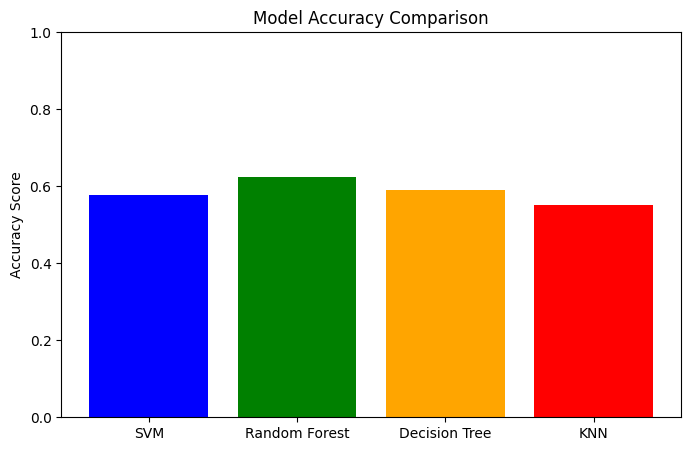

In [22]:
import matplotlib.pyplot as plt

# Accuracy scores
scores = [svm_score, rf_score, dt_score, knn_score]
models = ['SVM', 'Random Forest', 'Decision Tree', 'KNN']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

El random fores da mejores resultados en este caso